<a href="https://colab.research.google.com/github/nmys9/gsg-ComputerVision-Assignment/blob/main/Noor_Sakhel_Computer_Vision_Bootcamp_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Bootcamp: Assignment 2

## Reading

*Take* a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [ ]:
# Import the needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the image
from google.colab import files
upload=files.upload()
uploaded_image=list(upload.keys())[0]

I=cv2.imread(uploaded_image)


Saving flower2.jpeg to flower2.jpeg


Resize the image to 512*512 pixels using the resize function in OpenCV

In [ ]:
# Resize the image
resized_image=cv2.resize(I,(512,512))

## Converting

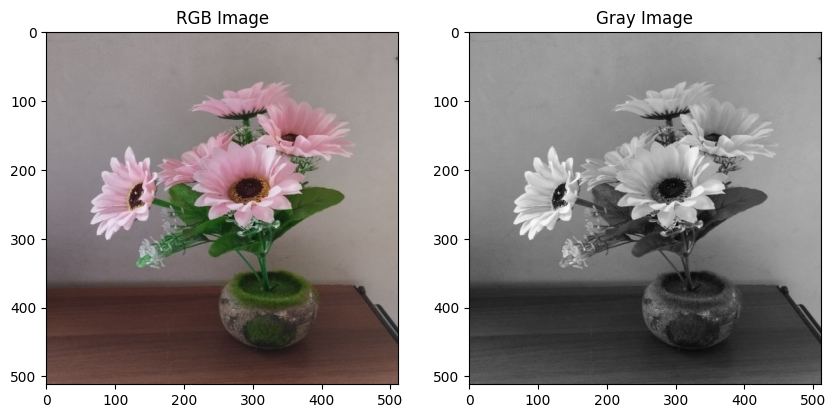

In [ ]:
# Convert the reseized image to RGB
rgb =cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)

# Convert the reseized image to grayscale
gray =cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)

# show the rgb and Gray images image
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title('RGB Image')

plt.subplot(1,2,2)
plt.imshow(gray,cmap='gray')
plt.title('Gray Image')

plt.show()


## Edge Detection

### Laplacian of Gaussian

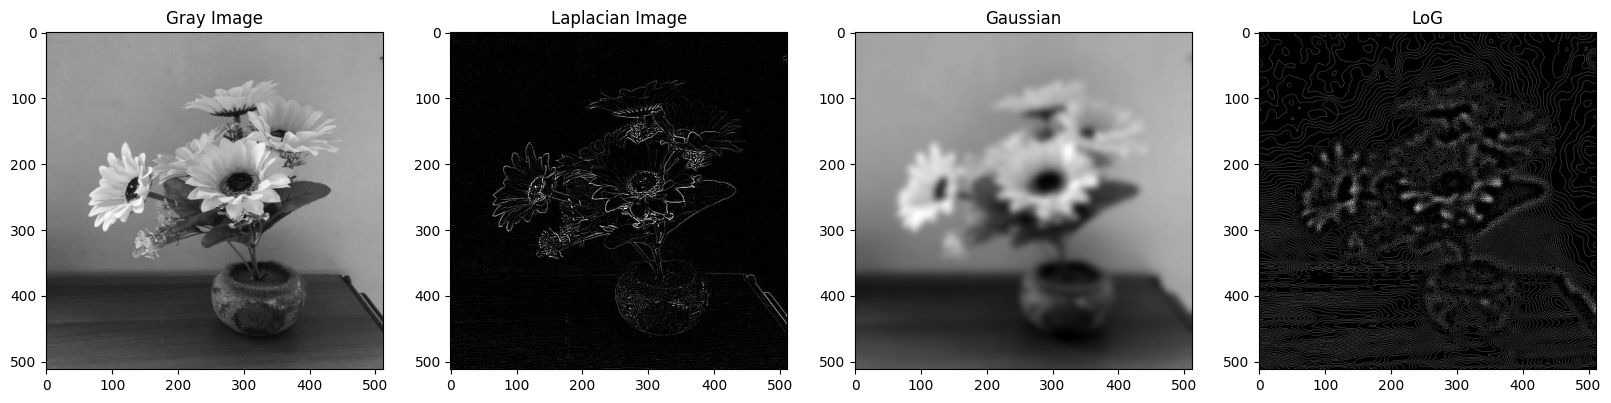

In [ ]:
# Convolve the gray resized image with a Laplacian
laplacian_mask=np.array([[-1,-1,-1],
                         [-1, 8,-1],
                         [-1,-1,-1]])
laplacian_image=cv2.filter2D(gray,-1,laplacian_mask)

# Convolve the gray resized image with a Gaussian of sigma 5
gaussian= cv2.GaussianBlur(gray,(31,31),5)

# Find the Laplacian of Gaussian
LoG=cv2.filter2D(gaussian,-1,laplacian_mask)

# Show the origional image, the laplacian, the gaussian, and the Laplacian of Gaussian results in one figure
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(gray,cmap='gray')
plt.title('Gray Image')

plt.subplot(1,4,2)
plt.imshow(laplacian_image,cmap='gray')
plt.title('Laplacian Image')

plt.subplot(1,4,3)
plt.imshow(gaussian,cmap='gray')
plt.title('Gaussian')

plt.subplot(1,4,4)
plt.imshow(LoG,cmap='gray')
plt.title('LoG')

plt.show()


### Difference of Gaussians

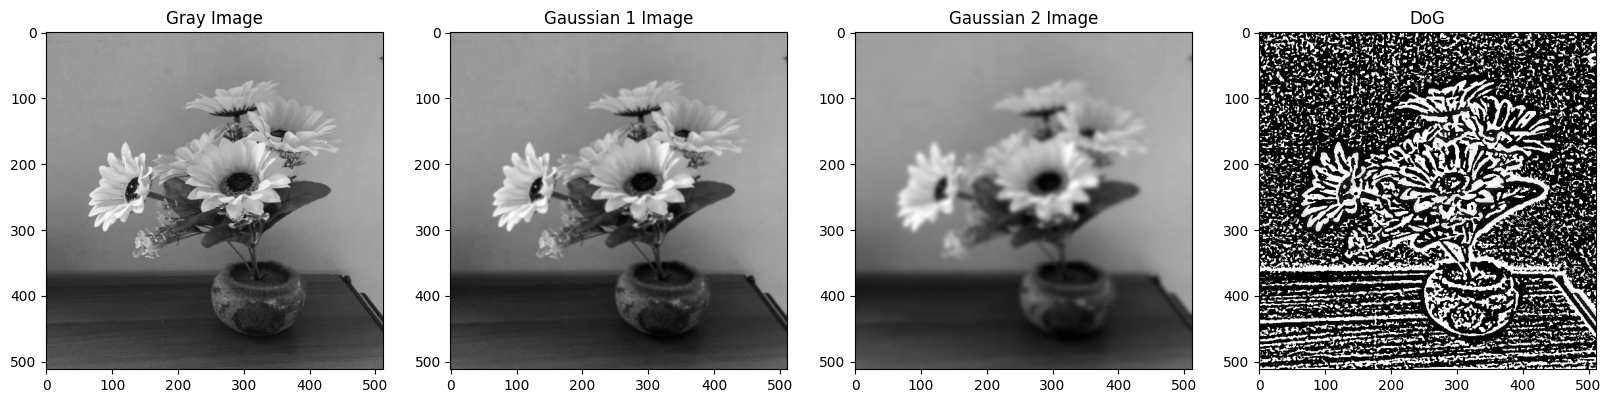

In [ ]:
# Convolve the gray resized image with two gaussians (one with a scale of 1 and another with a scale of 3)
gaussian_1=cv2.GaussianBlur(gray,(7,7),1)

gaussian_2=cv2.GaussianBlur(gray,(19,19),3)

# find the difference of gaussians
DoG=gaussian_2-gaussian_1

# Show the origional image, the two gaussians results, and the DoG results
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(gray,cmap='gray')
plt.title('Gray Image')

plt.subplot(1,4,2)
plt.imshow(gaussian_1,cmap='gray')
plt.title('Gaussian 1 Image')

plt.subplot(1,4,3)
plt.imshow(gaussian_2,cmap='gray')
plt.title('Gaussian 2 Image')

plt.subplot(1,4,4)
plt.imshow(DoG,cmap='gray')
plt.title('DoG')

plt.show()


### Canny Edge Detector

135.0 91 178


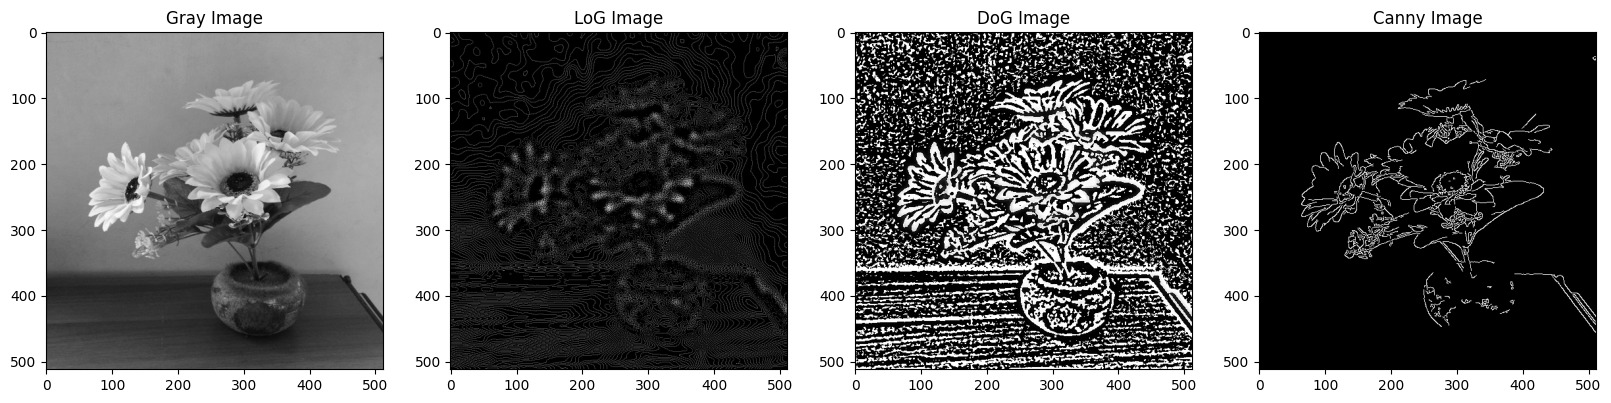

In [ ]:
# Find the median then the two thresholds of the gray resized image, and print the three values
v=np.median(gray)
lower=int(0.68*v)
upper=int(1.32*v)
print(v,lower,upper)

# Apply automatic Canny edge detection using the computed thresholds
canny_image=cv2.Canny(gray,lower,upper)

# show the origional image, the LoG, the DoG, and the Canny results in one figure
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(gray,cmap='gray')
plt.title('Gray Image')

plt.subplot(1,4,2)
plt.imshow(LoG,cmap='gray')
plt.title('LoG Image')

plt.subplot(1,4,3)
plt.imshow(DoG,cmap='gray')
plt.title('DoG Image')

plt.subplot(1,4,4)
plt.imshow(canny_image,cmap='gray')
plt.title('Canny Image')

plt.show()

## Morphological Operations

### Opening or Closing

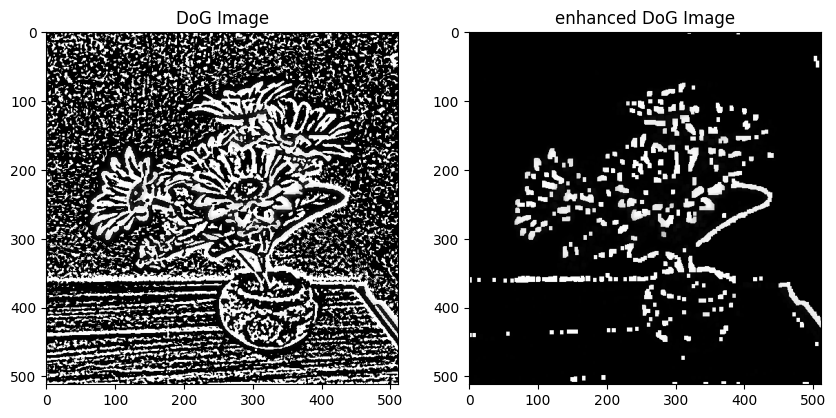

In [ ]:
# enhance the DoG results using opening or closing, create a mask with suitable size and shape then use opening or closing
kernel=np.ones((6,5),np.uint8)

opened=cv2.morphologyEx(DoG,cv2.MORPH_OPEN,kernel)

# show the origional Dog and the enhanced DoG
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(DoG,cmap='gray')
plt.title('DoG Image')

plt.subplot(1,2,2)
plt.imshow(opened,cmap='gray')
plt.title('enhanced DoG Image')

plt.show()


### Histogram and Binarization

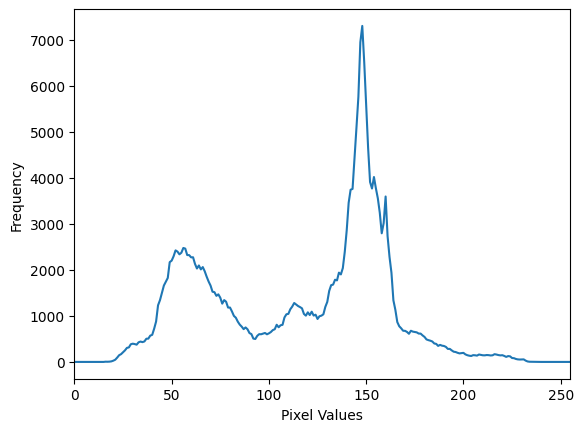

In [ ]:
# Find the histogram of the gray resized image and plot it
hist=cv2.calcHist([gray],[0],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.show()


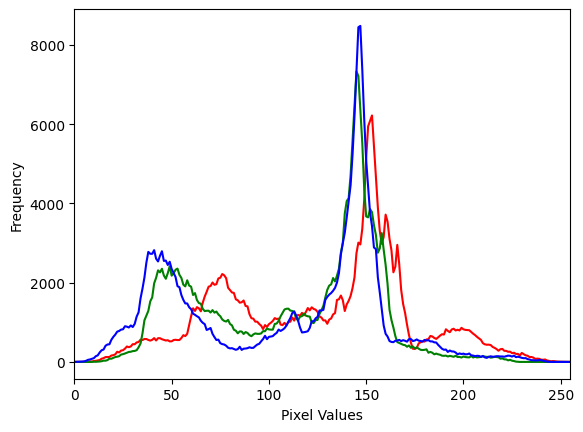

In [ ]:
# Calculate the histogram for each color channel and show them in one plot
colors=['r','g','b']

for ind,col in enumerate(colors):
  hist=cv2.calcHist([rgb],[ind],None,[256],[0,255])
  plt.plot(hist,color=col)
  plt.xlim([0,255])
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.show()

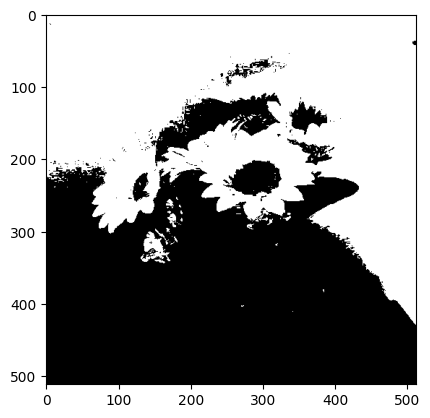

In [ ]:
# Using the peak of the histogram or the median value, binarise the gray scale image and show it
threshold=np.median(gray)

# binary=np.where(gray>threshold,255,0)
binary=cv2.threshold(gray,threshold,255,cv2.THRESH_BINARY)[1]

plt.imshow(binary,cmap='gray')
plt.show()

## Color Segmentation

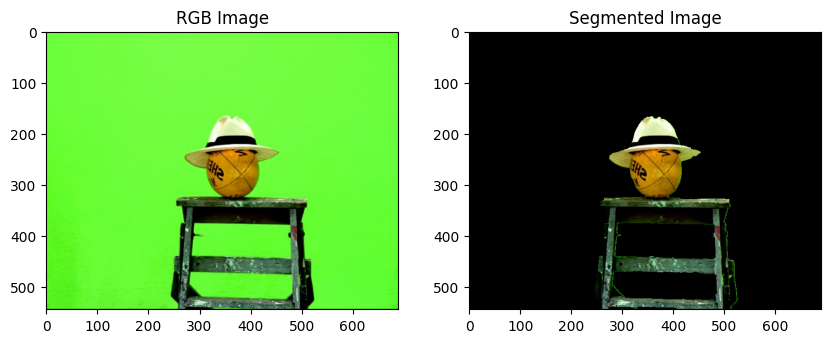

In [ ]:
# Load the image attached to the assignment called "segment"
I=cv2.imread('segment.jpg')
# Convert to suitable color space
rgb=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(I,cv2.COLOR_BGR2HSV)

# Define the color range for segmentation, we want to extract the object. Hint: you can extract the green then inverse the mask
lower_color =np.array([40,100,100])
upper_color =np.array([70,255,255])

# Create a mask with the specified color range
mask=cv2.inRange(hsv,lower_color,upper_color)

# enhance the mask using morphological operations
kerenl=np.ones((3,6),np.uint8)
opened=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kerenl)

# apply the mask on the original RGB image
opened_mask_not=cv2.bitwise_not(opened)

segmented=cv2.bitwise_and(rgb,rgb,mask=opened_mask_not)

# Display the original and segmented images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title('RGB Image')

plt.subplot(1,2,2)
plt.imshow(segmented,cmap='gray')
plt.title('Segmented Image')
plt.show()


## Feature extraction

### Harris

In [ ]:
import time

In [ ]:
def elapsed(start,end):
  print('elapsed time (seconds)',end-start)



elapsed time (seconds) 0.0044248104095458984


<function matplotlib.pyplot.show(close=None, block=None)>

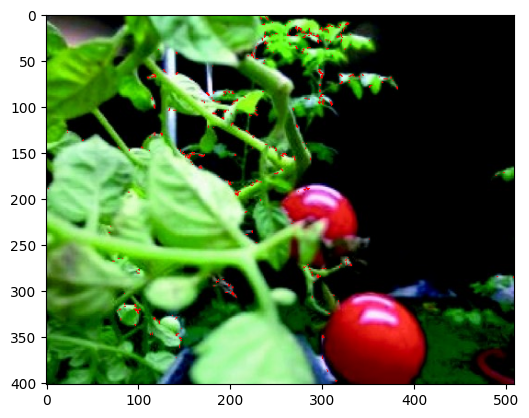

In [ ]:
# Load the image attached to the assignment called "extract"
I=cv2.imread('extract.jpg')
# convert it to suitable color space and value type for Harries function
image=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)

# Apply Harris function, and print its execution time
start=time.time()
harris=cv2.cornerHarris(gray,blockSize=2,ksize=3,k=0.04)
end=time.time()

elapsed(start,end)

# filter the number of corners and show them in red on the origional RGB image
threshold=0.01*harris.max()
image[harris>threshold]=[255,0,0]

plt.imshow(image)
plt.show

### SIFT

elapsed time (seconds) 0.1348414421081543
943


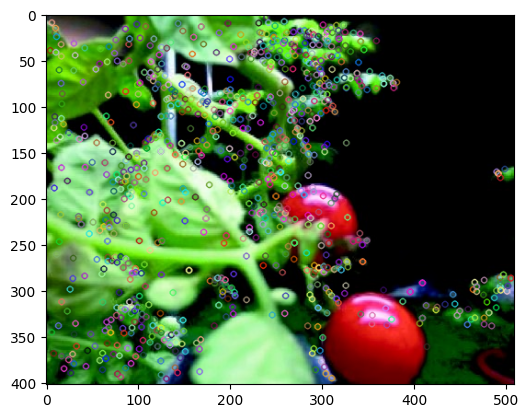

In [ ]:
# convert it to suitable color space and value type for SIFT function
image=cv2.imread('extract.jpg')

image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

sift=cv2.SIFT_create()

# Apply SIFT function, and print its execution time and number of keypoints
start=time.time()
keypoints, desc = sift.detectAndCompute(gray,None)
end=time.time()

elapsed(start,end)
print(len(keypoints))

# show the keypoints on the origional RGB image
sift_image = cv2.drawKeypoints(image,keypoints,None)
plt.imshow(sift_image)
plt.show()

### Fast

elapsed time (seconds) 0.0023877620697021484
2736


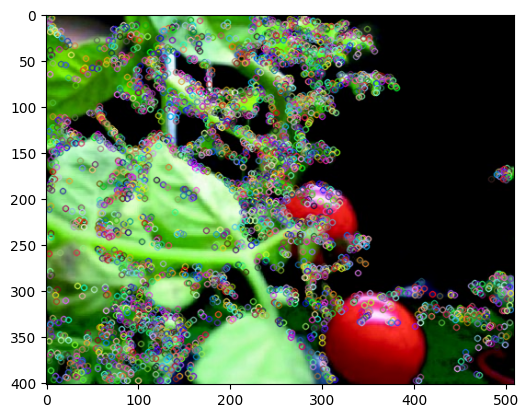

In [ ]:
# convert it to suitable color space and value type for Fast function
image=cv2.imread('extract.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

fast=cv2.FastFeatureDetector_create()
# Apply Fast function, and print its execution time and number of keypoints

start=time.time()
keypoints=fast.detect(gray,None)
end=time.time()

elapsed(start,end)
print(len(keypoints))

# show the keypoints on the origional RGB image

sift_image= cv2.drawKeypoints(image,keypoints,None)
plt.imshow(sift_image)
plt.show()


## What real life problems can you solve using the methods applied in this assignment?

Your Answer Here:التحقق من صحة المستندات والاوراق الرسمية حيث يمكن استخدامها في التحقق من الهوية في السفر او لتحقق من الملفات الطبية والمعلومات الشخصية من التزوير ويمكن استخدامها في تأمين البطاقات الائتمانية في عمليات الدفع عبر الانترنت